## Data Collection and Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '../data/raw/BrentOilPrices.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


## Inspecting the Data

In [2]:
# Inspect the dataset for missing values and data types
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB


Date     0
Price    0
dtype: int64

In [3]:
missing_values = data.isnull().sum()
print(missing_values)


Date     0
Price    0
dtype: int64


## Data Preprocessing

In [4]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='mixed')

# Sort the data by date
data = data.sort_values(by='Date')

# Reset index after sorting
data.reset_index(drop=True, inplace=True)

# Exploratory Data Analysis (EDA)

In [5]:
# Basic Statistics:
basic_statistics = data.describe()
print(basic_statistics)

                                Date        Price
count                           9011  9011.000000
mean   2005-02-10 23:46:53.760958720    48.420782
min              1987-05-20 00:00:00     9.100000
25%              1996-03-20 12:00:00    19.050000
50%              2005-02-02 00:00:00    38.570000
75%              2014-01-09 12:00:00    70.090000
max              2022-11-14 00:00:00   143.950000
std                              NaN    32.860110


## Visualize Data:

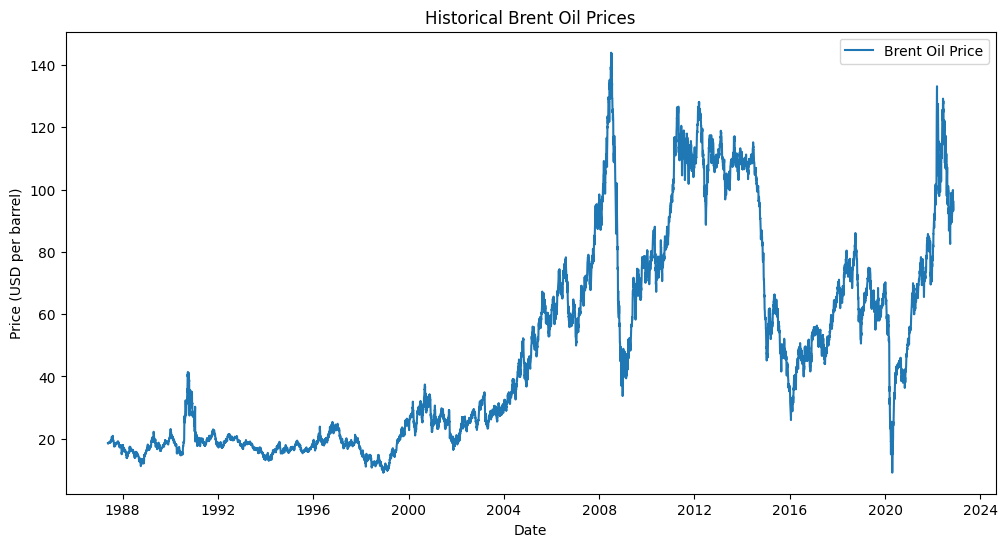

In [6]:
# Plot the time series data to identify trends and patterns:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Price'], label='Brent Oil Price')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.title('Historical Brent Oil Prices')
plt.legend()
plt.show()


## Identify Outliers:

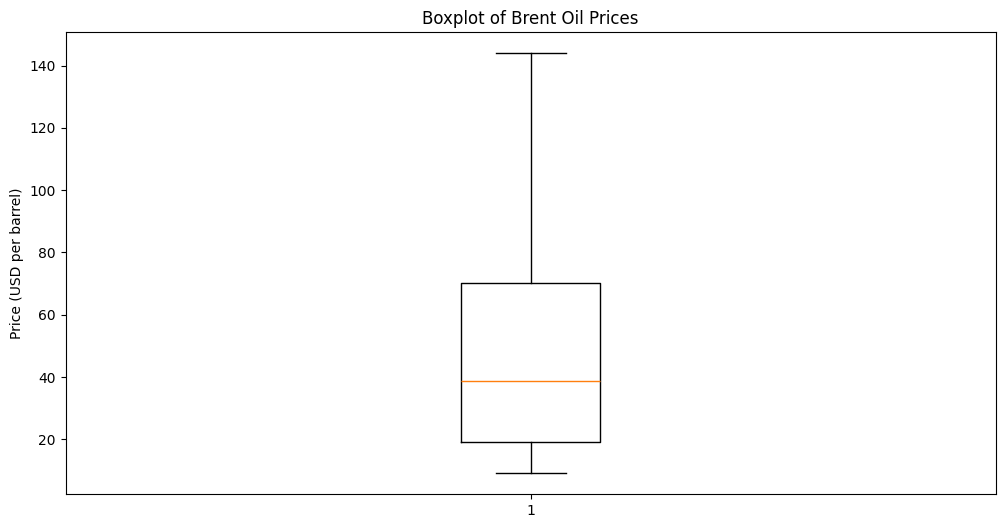

In [7]:
plt.figure(figsize=(12, 6))
plt.boxplot(data['Price'])
plt.title('Boxplot of Brent Oil Prices')
plt.ylabel('Price (USD per barrel)')
plt.show()


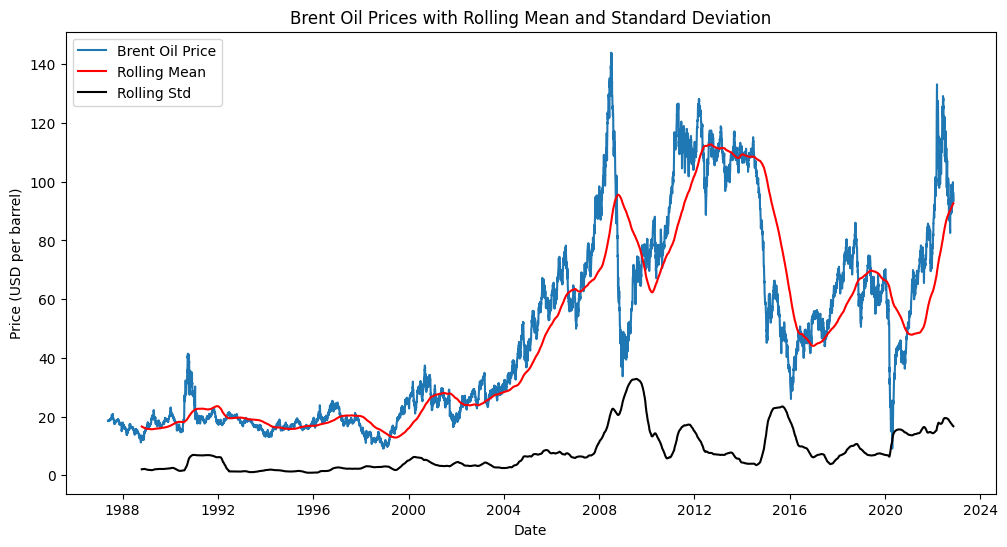

In [8]:
# Plotting a rolling mean and standard deviation
rolling_window = 365  # One year window

data['Rolling Mean'] = data['Price'].rolling(window=rolling_window).mean()
data['Rolling Std'] = data['Price'].rolling(window=rolling_window).std()

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Price'], label='Brent Oil Price')
plt.plot(data['Date'], data['Rolling Mean'], color='red', label='Rolling Mean')
plt.plot(data['Date'], data['Rolling Std'], color='black', label='Rolling Std')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.title('Brent Oil Prices with Rolling Mean and Standard Deviation')
plt.legend()
plt.show()


## Select Models for Analysis:

In [9]:
# ARIMA:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['Price'], order=(5, 1, 0))
model_fit = model.fit()
print(model_fit.summary())



                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 9011
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -14540.613
Date:                Thu, 04 Jul 2024   AIC                          29093.226
Time:                        20:07:04   BIC                          29135.862
Sample:                             0   HQIC                         29107.733
                               - 9011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0260      0.006      4.344      0.000       0.014       0.038
ar.L2         -0.0235      0.006     -4.231      0.000      -0.034      -0.013
ar.L3         -0.0071      0.005     -1.507      0.1

In [10]:
# GARCH
from arch import arch_model

model = arch_model(data['Price'], vol='Garch', p=1, q=1)
model_fit = model.fit()
print(model_fit.summary())


Iteration:      1,   Func. Count:      6,   Neg. LLF: 97378349170.75809
Iteration:      2,   Func. Count:     12,   Neg. LLF: 70148.66974057612
Iteration:      3,   Func. Count:     19,   Neg. LLF: 1129968244.5154305
Iteration:      4,   Func. Count:     27,   Neg. LLF: 44075.69933398171
Iteration:      5,   Func. Count:     33,   Neg. LLF: 42173.89746775047
Iteration:      6,   Func. Count:     39,   Neg. LLF: 42524.218688720146
Iteration:      7,   Func. Count:     45,   Neg. LLF: 41783.124606808684
Iteration:      8,   Func. Count:     51,   Neg. LLF: 43635.05932568072
Iteration:      9,   Func. Count:     57,   Neg. LLF: 36611.12516693526
Iteration:     10,   Func. Count:     62,   Neg. LLF: 37324.97110922865
Iteration:     11,   Func. Count:     72,   Neg. LLF: 38280.73151403671
Iteration:     12,   Func. Count:     79,   Neg. LLF: 36955.319750844064
Iteration:     13,   Func. Count:     85,   Neg. LLF: 35286.58541668807
Iteration:     14,   Func. Count:     90,   Neg. LLF: 35328.

## Time Series Modeling and Change Point Detection

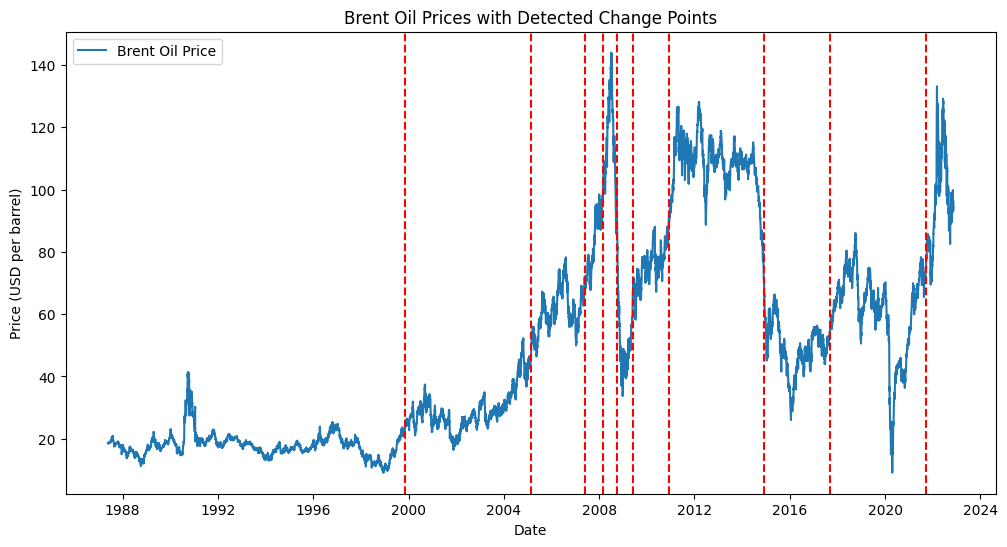

In [12]:
import ruptures as rpt
import matplotlib.pyplot as plt

# Convert the price data to a numpy array for change point detection
price_array = data['Price'].values

# Define the change point detection model: Binary Segmentation with the L2 cost function
model = rpt.Binseg(model="l2").fit(price_array)
breakpoints = model.predict(n_bkps=10)  # We can adjust the number of breakpoints as needed

# Filter out the last breakpoint if it is equal to the length of the array
breakpoints = [bkpt for bkpt in breakpoints if bkpt < len(price_array)]

# Plot the detected change points
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Price'], label='Brent Oil Price')
for bkpt in breakpoints:
    plt.axvline(data['Date'].iloc[bkpt], color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.title('Brent Oil Prices with Detected Change Points')
plt.legend()
plt.show()
